# Peterside Hospital - Heart Disease Case Study

In [1]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries - (Machine Learning Library)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost - (Machine Learning Library)
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset

df = pd.read_csv(r"D:\johns\Documents\PERSONAL VITAL DOCUMENTS\Full Stack Data Science - 10Alytics\10ALYTICS July 2023 Cohort\Week 11\Assignment - WMDI\Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## The Features in the Dataset and meaning

- age = age in years,
- sex = (1= Male, 0= Female)
- cp = chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- trestbps = resting blood pressure (in mm Hg on admission to the hospital)
- chol = serum cholesterol in mg/dl
- fbs = fasting blood sugar > 120 mg/dl (1=true, 0=false)
- restecg = resting electrocardiographic results
- thalach = maximum heart rate achieved 
- exang = exercise induced angina (1=yes, 0=no)
- oldpeak = ST depression induced by exercise relative to rest 
- slope = the slope of the peak exercise ST segment
- ca = number of major vessels (0-3) colored by flourosopy
- thal (thalassemia) = (3=normal, 6=fixed defect, 7=reversable defect)
- target = have heart disease or not (1=yes, 0=no)

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# for better understanding and flow of the analysis, some of the columns will be renamed.

df.columns= ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate_achieved',
       'exercise_induced_angina', 'ST_depression', 'ST_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Data Verification - Data type, number of features and rows, missing data, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heartrate_achieved   303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
# Statistical analysis of the data

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heartrate_achieved     0
exercise_induced_angina    0
ST_depression              0
ST_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


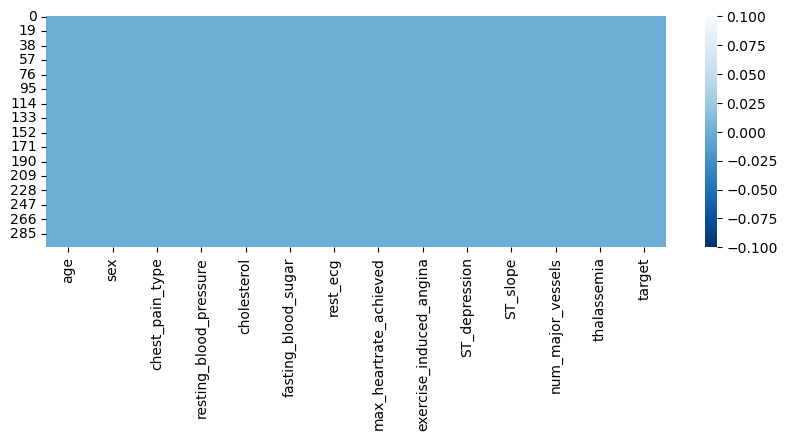

In [7]:
#Check for missing values
print(df.isnull().sum())

#visualize the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

## Exploratory Data Analysis

#### Univariate Analysis

<Axes: xlabel='thalassemia'>

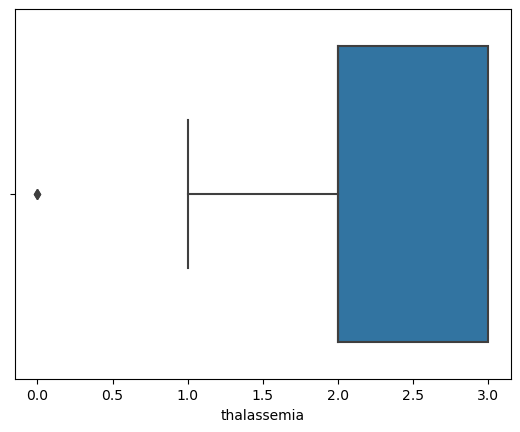

In [8]:
#Check for outliers
sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

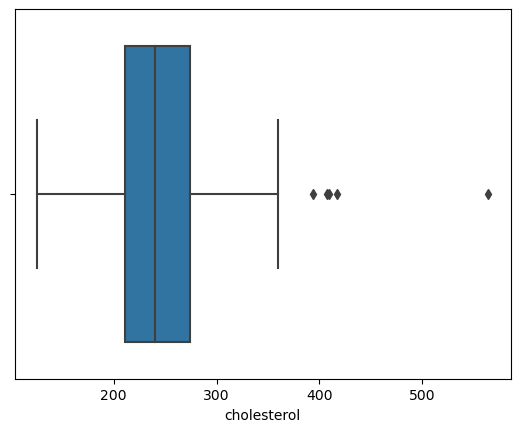

In [9]:
#Check for outliers
sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

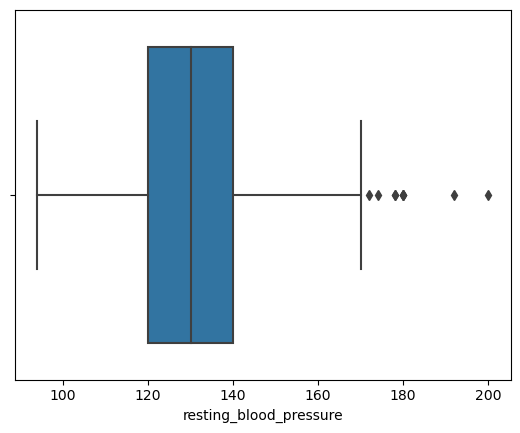

In [10]:
#Check for outliers
sns.boxplot(x=df["resting_blood_pressure"])

<Axes: xlabel='max_heartrate_achieved'>

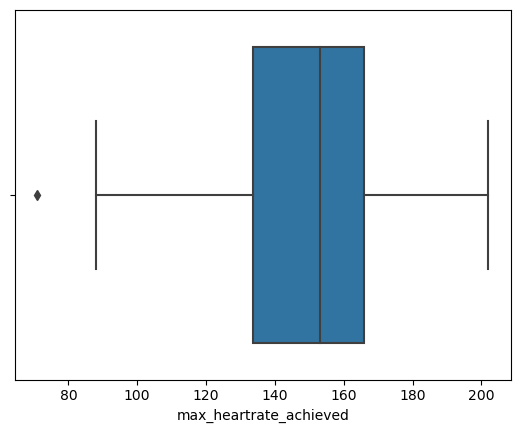

In [11]:
#Check for outliers
sns.boxplot(x=df["max_heartrate_achieved"])

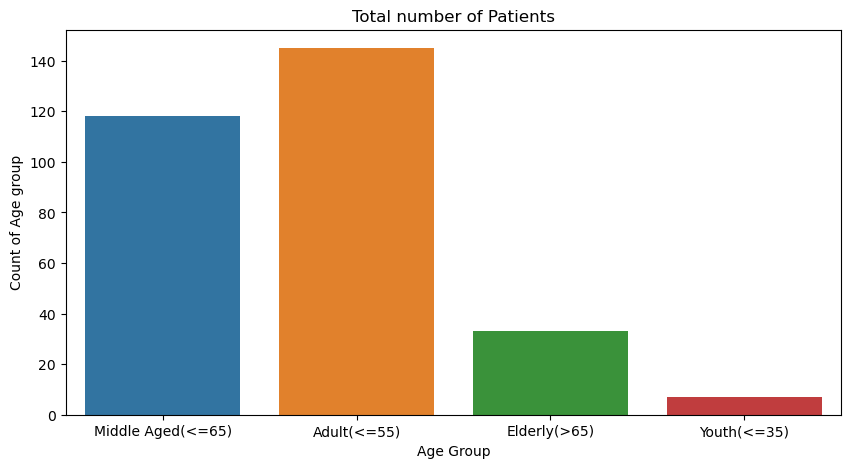

In [12]:
#Data Visualization
#Age Bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Middle Aged(<=65)"
    else: 
        return "Elderly(>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

#Investigating the Age groups of Patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age group')
plt.title('Total number of Patients')

# Sorting the DataFrame by the 'age' column in descending order
df_sorted = df.sort_values(by='age_bracket', ascending=False);

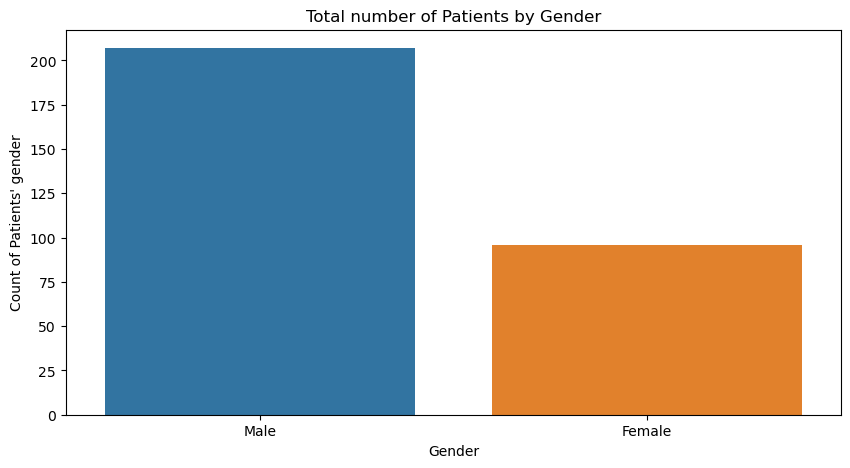

In [13]:
#Data Visualization
#Gender

def gender(sex):
    if sex == 1:
        return "Male"
    else: 
        return "Female"
    
df['gender'] = df['sex'].apply(gender)

#Investigating the Age groups of Patients
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel("Count of Patients' gender")
plt.title('Total number of Patients by Gender')

# Sorting the DataFrame by the 'age' column in descending order
df_sorted = df.sort_values(by='gender', ascending=False);

In [14]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heartrate_achieved', 'exercise_induced_angina', 'ST_depression',
       'ST_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_bracket',
       'gender'],
      dtype='object')

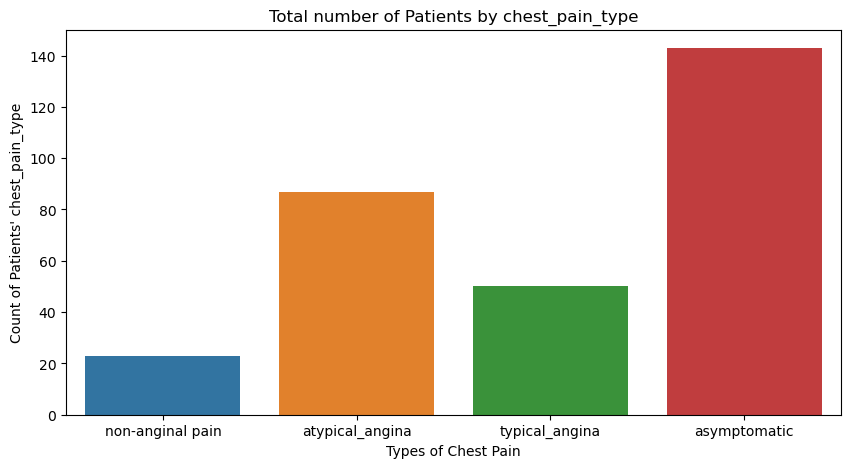

In [15]:
#Data Visualization
#chest_pain_type

def chest_pain(cp):
    if cp == 1:
        return "typical_angina"
    elif cp == 2:
        return "atypical_angina"
    elif cp == 3:
        return "non-anginal pain"
    else: 
        return "asymptomatic"
    
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#Investigating the chest pain types of Patients
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of Chest Pain')
plt.ylabel("Count of Patients' chest_pain_type")
plt.title('Total number of Patients by chest_pain_type')

# Sorting the DataFrame by the 'age' column in descending order
df_sorted = df.sort_values(by='cp_cat', ascending=False);

Yes    165
No     138
Name: label, dtype: int64


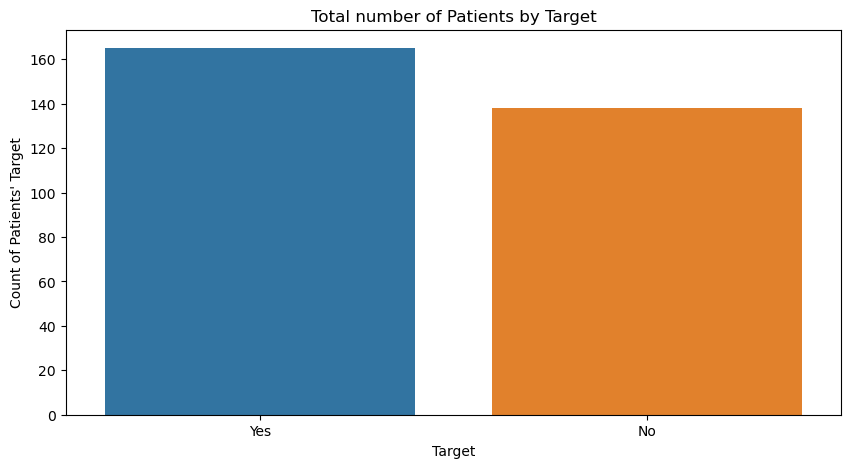

In [16]:
#Data Visualization
#target

def label(tg):
    if tg == 1:
        return "Yes"
    else: 
        return "No"
    
df['label'] = df['target'].apply(label)

#Total Patient in each category
print(df['label'].value_counts())

#Investigating the Target of Patients
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel("Count of Patients' Target")
plt.title('Total number of Patients by Target')

# Sorting the DataFrame by the 'age' column in descending order
df_sorted = df.sort_values(by='label', ascending=False);

In [17]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Aged(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical_angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical_angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Aged(<=65),Male,typical_angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Aged(<=65),Female,asymptomatic,Yes


## Bivariate Analysis

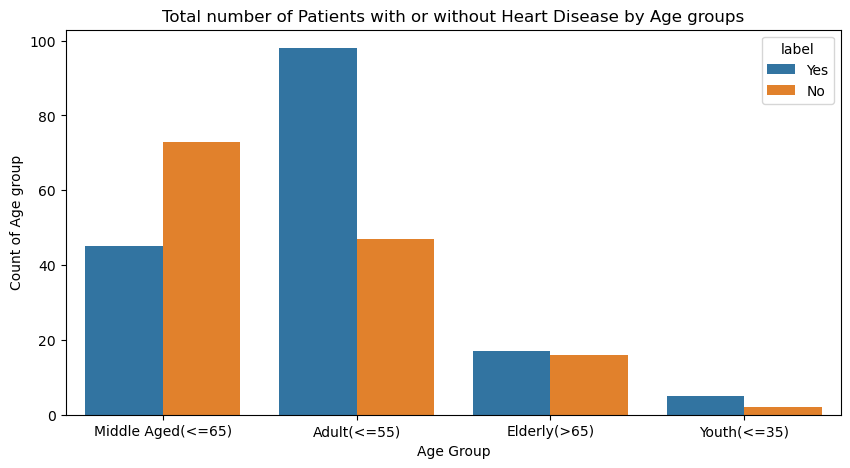

In [18]:
#Investigating the Age groups of Patients by Target feature
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age group')
plt.title('Total number of Patients with or without Heart Disease by Age groups');

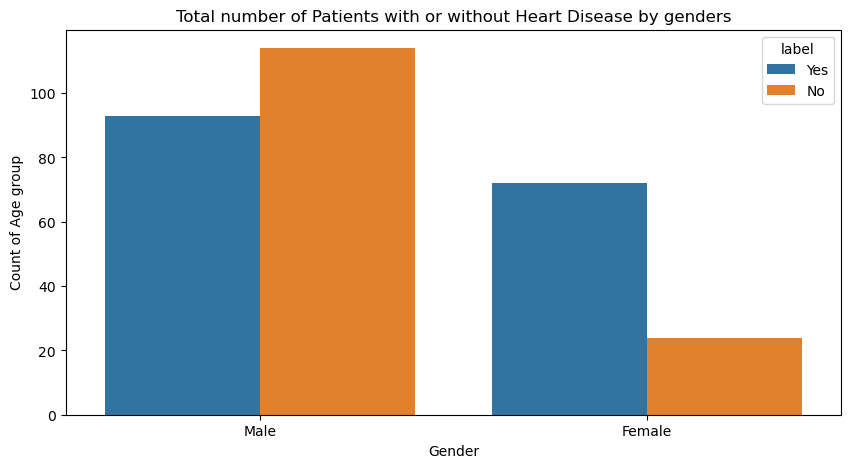

In [19]:
#Investigating the Age groups of Patients and their genders
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Age group')
plt.title('Total number of Patients with or without Heart Disease by genders');

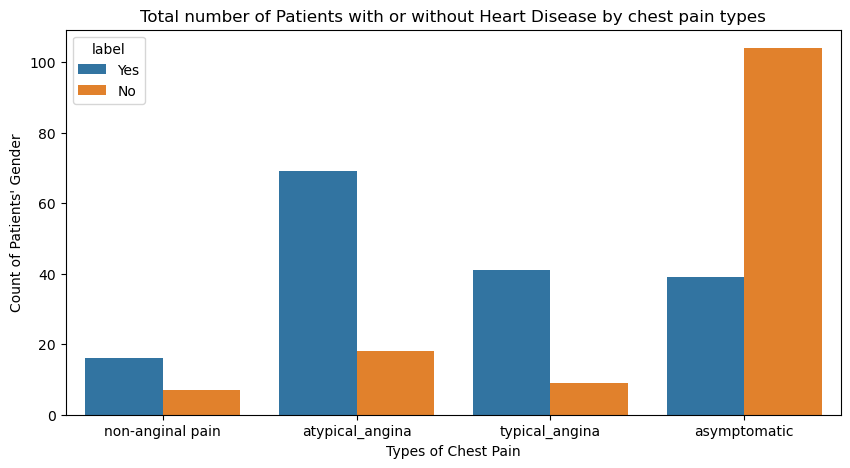

In [20]:
#Investigating the Age groups of Patients and chest pain types
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of Chest Pain')
plt.ylabel("Count of Patients' Gender")
plt.title('Total number of Patients with or without Heart Disease by chest pain types');

### Narration/Observation

- narrations on the above visualisations.

## Multivariate Analysis

- Investigating 3 features/columns or more

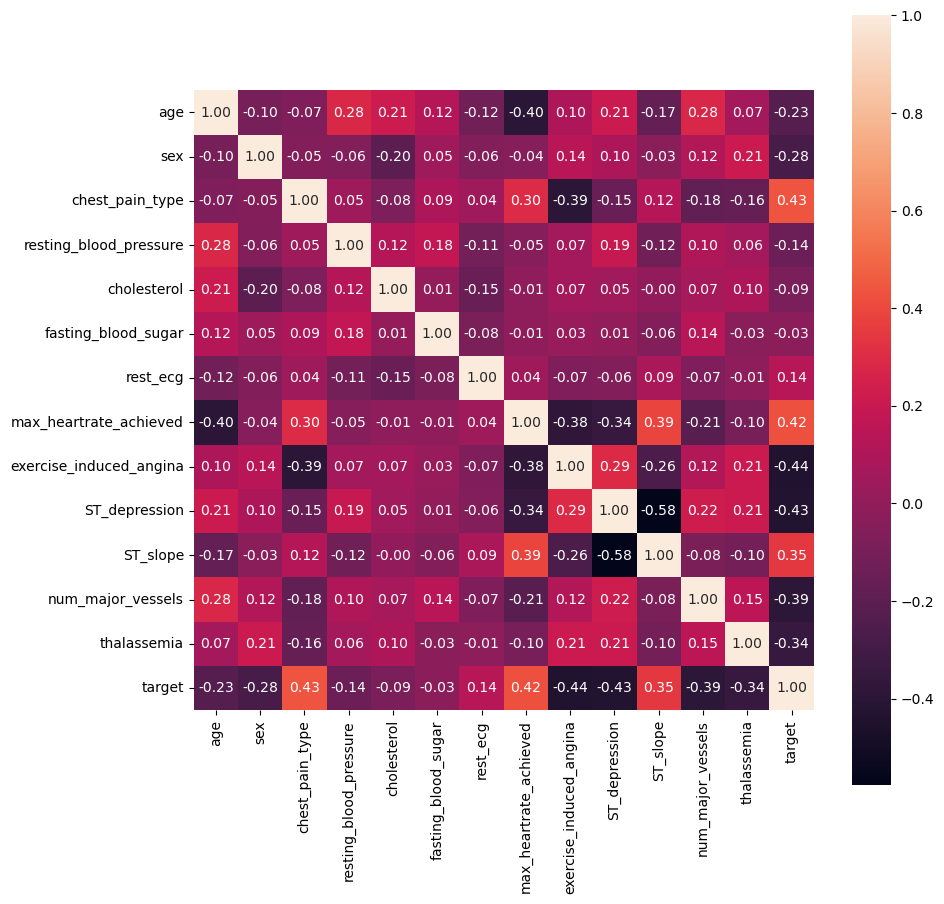

In [21]:
#Correlation between Saleprice and other variables in the dataset

plt.figure(figsize=(10,10))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

### Narration

- A negative relationship is seen between Age, Sex, resting_blood_pressure, cholesterol, fasting_blood_sugar, exercise_induced_angina, ST_depression, num_major_vessels and thalassemia with Target.

## Feature Engineering/Data Pre-Processing

In [22]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Middle Aged(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical_angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical_angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Aged(<=65),Male,typical_angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Aged(<=65),Female,asymptomatic,Yes


In [23]:
# create a copy of the data, (exclude Target/Label, and other categorical columns that were earlier created)

df1= df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate_achieved',
       'exercise_induced_angina', 'ST_depression', 'ST_slope', 'num_major_vessels', 'thalassemia']]

label= df[['target']]

In [24]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heartrate_achieved,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [26]:
#checking data types of the columns, as no object or boolean dtypes are needed for machine learning.

df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heartrate_achieved       int64
exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [27]:
#Dealing with Outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heartrate_achieved'.

# Normalize the data
scaler= MinMaxScaler()

# Fit and transform the selected columns
df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1,1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1,1))
df1["Scaled_max_heartrate"] = scaler.fit_transform(df1[['max_heartrate_achieved']].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heartrate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heartrate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine Learning

In [28]:
df1.shape

(303, 13)

In [29]:
label.shape

(303, 1)

In [30]:
# Split hte dataset into training and testing sets - X=questions, y=answers

X_train, X_test, y_train, y_test= train_test_split(df1, label, test_size=0.2, random_state=42)

In [31]:
X_train.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heartrate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389


In [32]:
y_train.head()

,target
132,1
202,0
196,0
75,1
176,0


In [33]:
X_test

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,ST_depression,ST_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heartrate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


In [34]:
#Model Building


#logistic regression model
logreg = LogisticRegression()

#Fit the model on the training data
logreg.fit(X_train, y_train)

#Make predictions on the testing data
ly_pred = logreg.predict(X_test)

#Evaluate the model and Print the results
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred));

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-Score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


In [35]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [36]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


## Narration/Observation


The provided metrics are commonly used to evaluate the performance of a classification model, such as logistic regression. Let's interpret each metric:

- **Accuracy (0.8361):** It represents the ratio of correctly predicted instances to the total instances and 83.61% of the predictions are correct.

- **Precision (0.8667):** Precision is the ratio of correctly predicted positive observations to the total predicted positives and When the model predicts a positive outcome, it is correct 86.67% of the time.

- **Recall (or Sensitivity) (0.8667):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class and the model captures 86.67% of all actual positive instances.

- **F1-Score (0.8387):** The F1-Score is the weighted average of Precision and Recall. It considers both false positives and false negatives and A higher F1-Score indicates a better balance between precision and recall. Here, it's 83.87%.

- **AUC-ROC (0.8373):** The Area Under the Receiver Operating Characteristic (ROC) curve. It provides an aggregate measure of performance across various classification thresholds and a higher AUC-ROC value (closer to 1) indicates better discrimination between positive and negative classes.

#### Deduction

The model shows reasonably good performance, with accuracy around 83.61%, indicating that it correctly predicts outcomes a significant portion of the time.

Precision and recall are balanced, with similar values around 86.67%, suggesting the model is performing well in both identifying positive cases and avoiding false positives.

The F1-Score indicates a good balance between precision and recall.

The AUC-ROC value is relatively high, indicating good discrimination between positive and negative instances.

It's important to note that the interpretation might vary based on the specific context and requirements of your problem. For example, the trade-off between precision and recall depends on the relative cost of false positives and false negatives in your application.

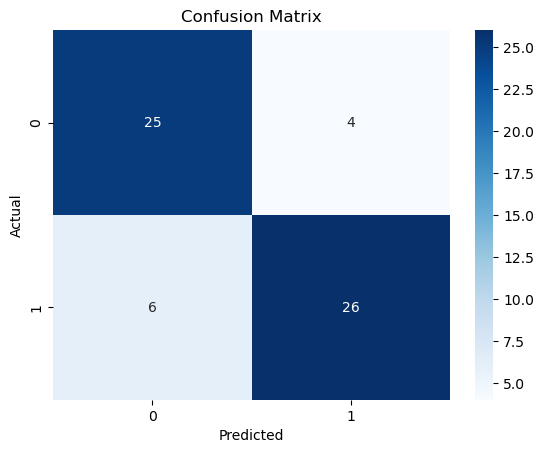

In [37]:
#Create a Confusion Matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
#Model Building

#Random Forest Classifier
rfc = RandomForestClassifier()

#Fit the model on the training data
rfc.fit(X_train, y_train)

#Make predictions on the testing data
rfy_pred = rfc.predict(X_test)

#Evaluate the model and Print the results
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-Score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-Score: 0.8787878787878787
AUC-ROC: 0.8669181034482758


## Narration/Observation

The metrics provided are common evaluation metrics for a binary classification model, such as a logistic regression model. Here's an interpretation of each metric:

1. **Accuracy (0.8852):**
   Accuracy is the ratio of correctly predicted instances to the total instances and In this case, the model has an accuracy of approximately 88.52%, indicating that it correctly predicted the target variable in about 88.52% of the cases.

2. **Precision (0.8788):**
   Precision is the ratio of correctly predicted positive observations to the total predicted positives and In this context, precision of approximately 87.88% means that when the model predicts the positive class, it is correct about 87.88% of the time.

3. **Recall (0.9063):**
   Recall, also known as Sensitivity or True Positive Rate, is the ratio of correctly predicted positive observations to the all observations in the actual class and a recall of approximately 90.63% suggests that the model correctly identified about 90.63% of all actual positive instances.

4. **F1-Score (0.8923):**
   The F1-score is the harmonic mean of precision and recall, providing a balance between the two and an F1-score of approximately 89.23% suggests a good balance between precision and recall.

5. **AUC-ROC (0.8842):**
   The Area Under the Receiver Operating Characteristic (ROC) curve measures the trade-off between true positive rate and false positive rate across different probability thresholds and an AUC-ROC of approximately 88.42% indicates a good overall performance of the model in distinguishing between the two classes.

In summary, the model seems to perform well, with high accuracy, precision, recall, and F1-score. 
The AUC-ROC value further supports the model's ability to discriminate between the positive and negative classes. 
However, it's essential to consider the specific context of the problem and the trade-offs between precision and recall based on the problem's requirements.

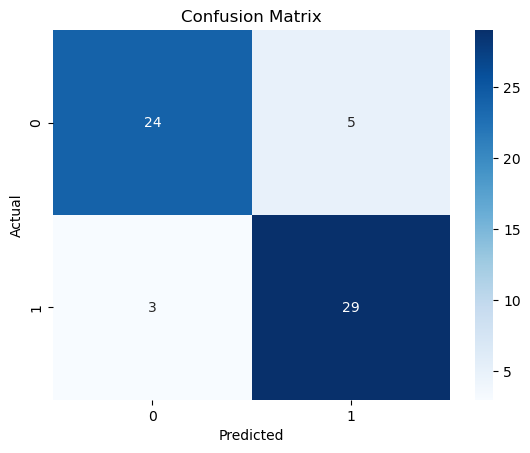

In [39]:
#Create a Confusion Matrix
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
#8 machine learning algorithms to be applied

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [41]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeC

In [42]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = [str(round(a_score * 100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score * 100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score * 100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score * 100, 2)) + '%']
    
    if model_name != classifiers[-1][1]:
        print('')

In [43]:
classifiers[0][1]

'XGB Classifier'

In [44]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['83.61%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifier': ['86.89%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['83.61%']}

In [45]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,83.61%,75.41%,86.89%,65.57%,86.89%,85.25%,83.61%


In [46]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,84.38%,79.31%,85.29%,65.71%,90.0%,92.59%,86.67%


In [47]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,84.38%,71.88%,90.62%,71.88%,84.38%,78.12%,81.25%


In [48]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,83.57%,75.59%,86.69%,65.25%,87.02%,85.61%,83.73%
